# Thermalization-inspired training of Restricted Boltzmann machines
## Notebook 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def prob_to_binary(probs):
    return np.random.binomial(1,probs)

# RBM which encodes probabilities instead of binary values 

The RBM is also set up so that it can interact with a bath

Note: in the last implementation, I used direct node-to-node mixing between visible and hidden layers. Here, I will allow multiple visible nodes to interact with each hidden node, and vice versa. For starters, I will let the mixing parameters be random

In [15]:
class RBMProb:
    """A probabilistic implementation of a Restricted Boltzmann Machine."""
    def __init__(self, num_v = 4, num_h = 4, bath_coupling = 0.1):
       
        #internal parameters
        self.num_v = num_v
        self.num_h = num_h
        
        #initial biases/couplings are random
        #self.b_v = np.random.uniform(size = (num_v,))
        #self.b_h = np.random.uniform(size = (num_h,)) 
        #self.w = np.random.uniform(size = (num_v,num_h))
        
        #initial state of visible and hidden units is random
        self.visible_probs = np.random.uniform(size = (num_v,))
        self.hidden_probs = np.random.uniform(size = (num_h,))            
        
        #mixing parameters
        self.mixing_params = np.random.uniform(size=(num_v,num_h))
        self.bath_coupling = bath_coupling

    def __str__(self):
        stateString = 'vis_probs: \n' + str(self.visible_probs) + '\n' + 'hid_probs: \n'+ str(self.hidden_probs) + '\n' 
        return stateString
                
    def evolve(self, num_steps, print_states = True):
        #internal evolution of RBM
        
        m = self.mixing_params
        
        if print_states:
            print 'Initial state: '
            print self
        
        for ctr in range(num_steps):
            #perform update
            hidden_update = np.dot(m,self.visible_probs) + np.dot(1-m, self.hidden_probs)
            self.hidden_probs = hidden_update/np.sum(hidden_update)
            visible_update = np.dot(m,self.hidden_probs) + np.dot(1-m,self.visible_probs)
            self.visible_probs = visible_update/np.sum(visible_update)

        if print_states:        
            print '\nFinal state: '
            print self

    def interact_with_bath(self, bath):
        
        m = self.bath_coupling
        
        if bath.rep == 'probability':
            self.visible_probs = bath.probs
        elif bath.rep == 'binary':
            self.visible_probs = m*bath.state + (1-m)*self.visible_probs

# Define simple bath models

In [16]:
class Bath:
    def __init__(self, num_v = 4, representation = 'probability'):
        
        self.num_v = num_v
        self.rep = representation
        #for the moment, take fixed bath state
        self.probs = np.zeros((num_v,))
        if self.rep == 'binary':
            self.state = prob_to_binary(self.probs)
            
    def refresh(self,new_vals):
        if self.rep == 'binary':
            self.state = new_vals
        elif self.rep == 'probability':
            self.probs = new_vals

# Initialize system and bath

Note: we will explore two representations for the bath

In [21]:
#initialize system and bath parameters
np.random.seed(0)
num_levels = 5
num_v = num_levels
num_h = num_levels
m = np.random.uniform(size=(num_v,num_h))
sys = RBMProb(num_v,num_h) 

betas = np.random.uniform(0.0,2.0,num_levels) #arbitrary choice of betas
bath_probs = np.exp(-betas)
bath_probs /= sum(bath_probs)

data_prob = Bath(num_v,representation='probability')
data_binary = Bath(num_v,representation='binary')

# Let system and bath interact and equilibriate

### Use probability encoding for bath

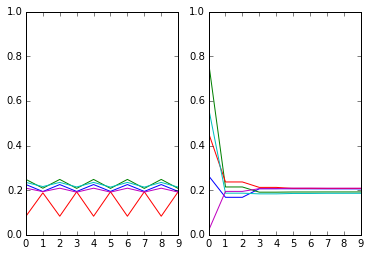

In [22]:
#let sys/bath interact
num_steps = 5

store_visible = []
store_hidden = []
for ctr in range(0,num_steps):

    #update bath (doesn't do anything in this case)
    data_prob.refresh(bath_probs)
    
    #interact with bath
    sys.interact_with_bath(data_prob)
    store_visible.append(list(sys.visible_probs))
    store_hidden.append(list(sys.hidden_probs))
    
    #system self-interaction
    sys.evolve(1,print_states=False)
    store_visible.append(list(sys.visible_probs))
    store_hidden.append(list(sys.hidden_probs))

store_visible = np.array(store_visible)
store_hidden = np.array(store_hidden)
    
ax1=plt.subplot(1,2,1);
plt.plot(store_visible);
plt.subplot(1,2,2,sharey = ax1);
plt.plot(store_hidden);
ax1.set_ylim([0.0,1.0]);

Clearly now the visible and hidden units do not equilibriate to the same values

In [19]:
print sys.visible_probs
print sys.hidden_probs
print bath_probs

[ 0.19439611  0.2078102   0.19272129  0.21371144  0.19136096]
[ 0.2057481   0.1919888   0.20746603  0.18593571  0.20886136]
[ 0.22512994  0.24810862  0.08325912  0.2346866   0.20881573]


Abandoned... moving on